In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [4]:
df.nunique()

Unnamed: 0             6704
Age                      41
Gender                    3
Education Level           7
Job Title               193
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

## Data Cleaning

In [5]:
# Drop NaN Values 
df.dropna(how='any', axis=0, inplace=True)

In [6]:
# Reduce unique values of Gender
df = df[df['Gender'] != 'Other']
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Name: count, dtype: int64

In [7]:
# Reduce unique values of Education Level
def edu_group(x):
    if x in ['Bachelor\'s Degree', 'Bachelor\'s']:
        return 'Bachelor'
    elif x in ['Master\'s Degree', 'Master\'s']:
        return 'Master'
    elif x in ['PhD', 'phD']:
        return 'PhD'
    elif x == 'High School':
        return 'High School'

df['Education Level'] = df['Education Level'].apply(lambda x : edu_group(x))

In [8]:
# Reduce unique values of Job Title
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [9]:
# Drop Outlayers 
df = df[df['Salary']>1000]

## Data Visualization

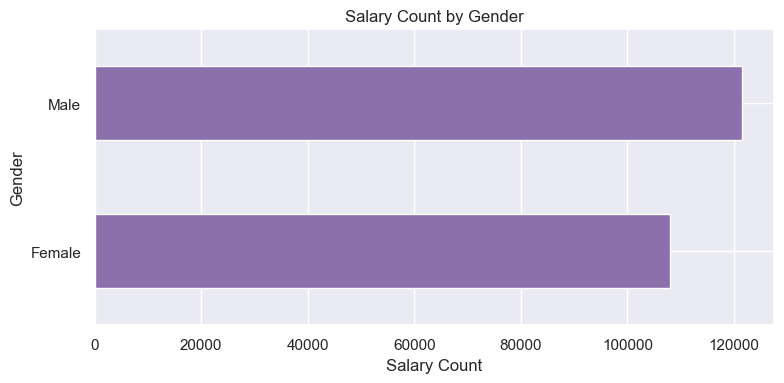

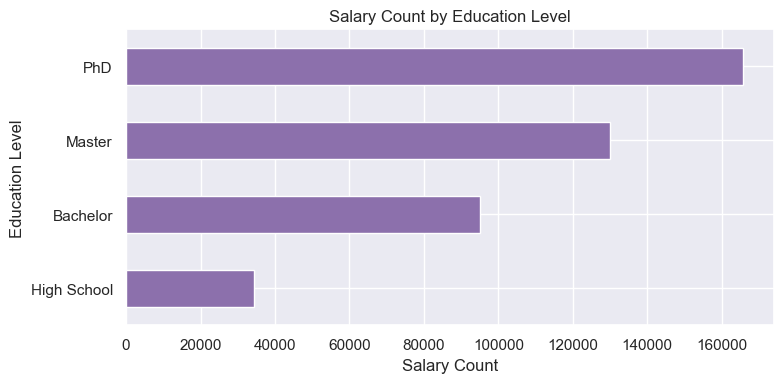

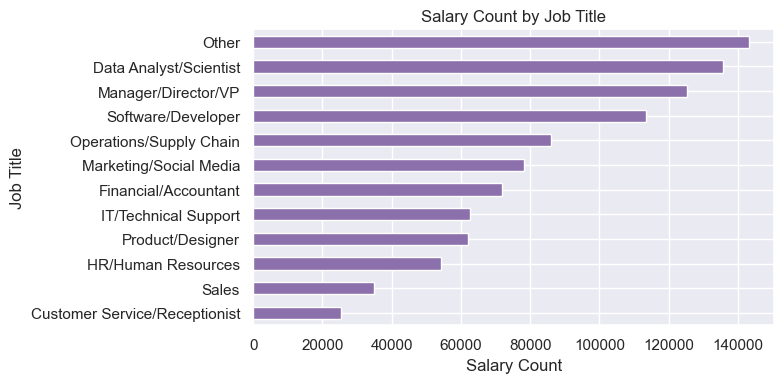

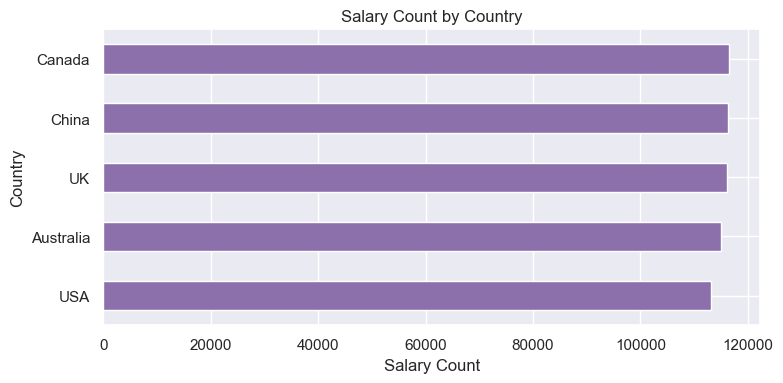

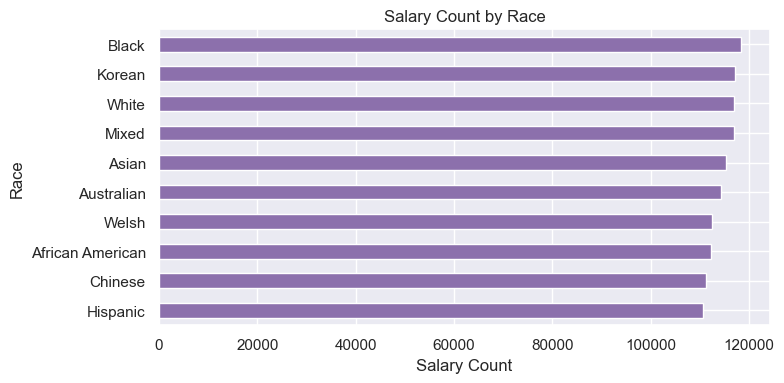

In [12]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.sort_values(ascending=True, inplace=True)
    barh.plot(kind='barh',  color = '#8c70ac', figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Gender', 'Salary', df)
bar_plot('Education Level', 'Salary', df)
bar_plot('Job Title', 'Salary', df)
bar_plot('Country', 'Salary', df)
bar_plot('Race', 'Salary', df)

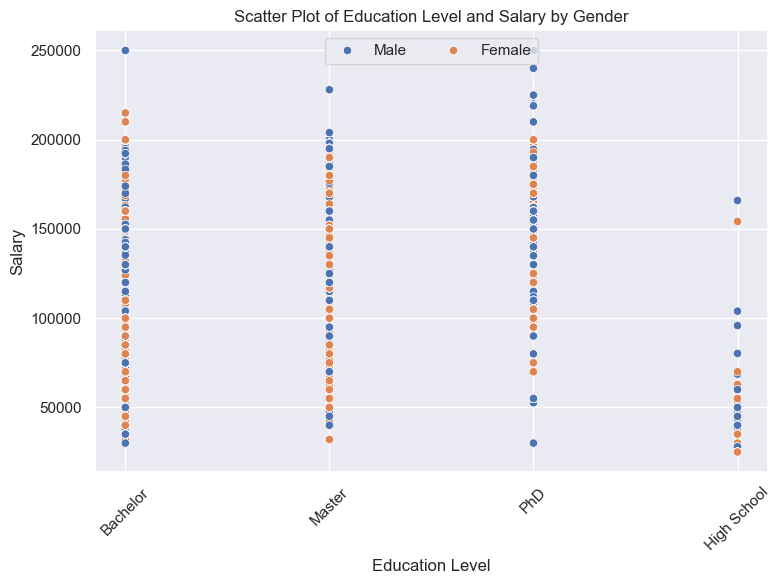

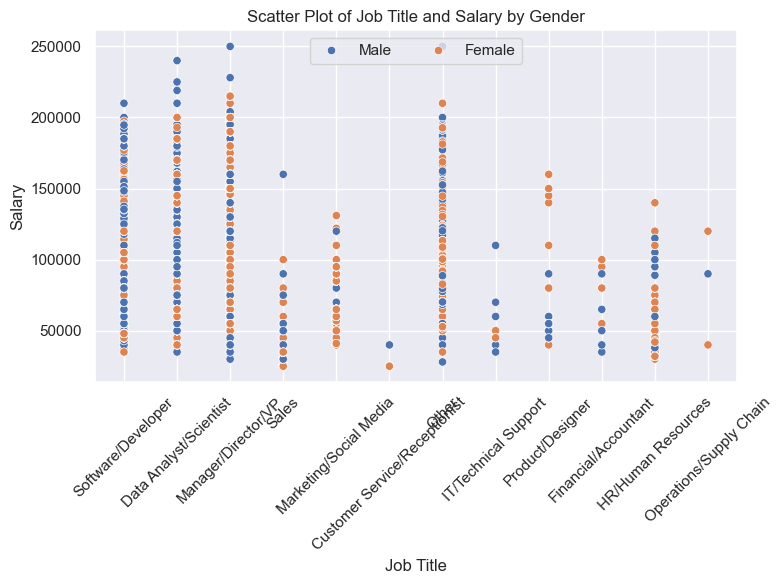

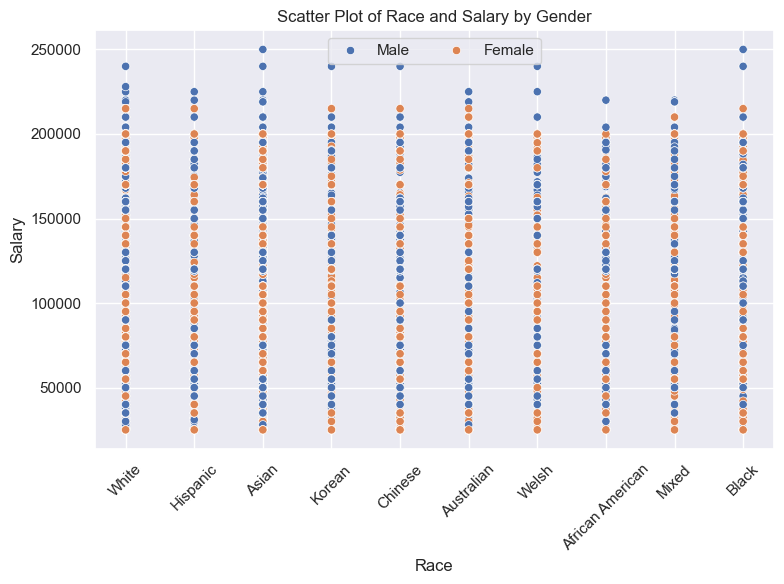

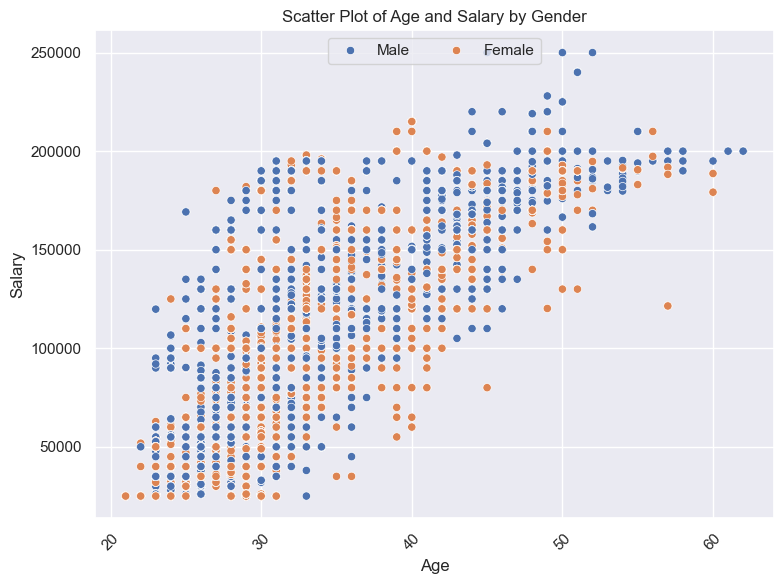

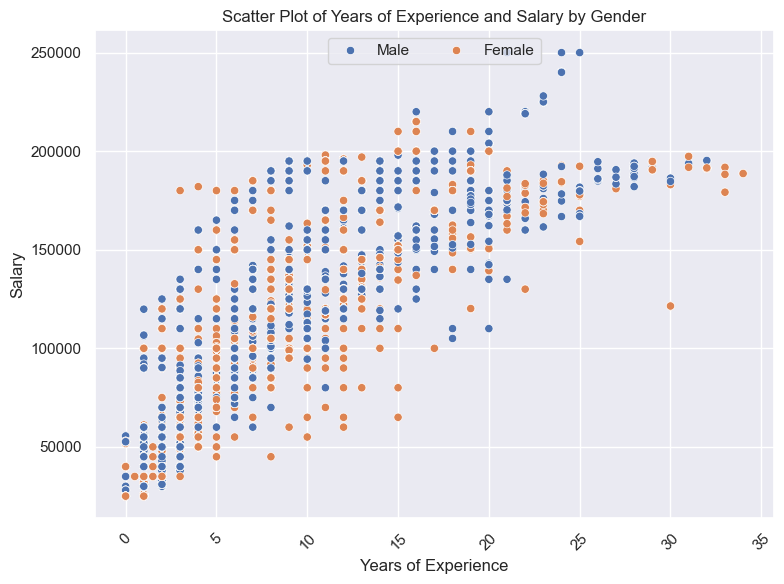

In [13]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {x} and {y} by {hue}')
    plt.legend(title=None, ncol=2, loc='upper center')
    plt.xticks(rotation=45)
    plt.xlabel(x)
    plt.ylabel(y)

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="Education Level", y="Salary", hue="Gender")
scatter_plot(data=df, x="Job Title", y="Salary", hue="Gender")
scatter_plot(data=df, x="Race", y="Salary", hue="Gender")
scatter_plot(data=df, x="Age", y="Salary", hue="Gender")
scatter_plot(data=df, x="Years of Experience", y="Salary", hue="Gender")

## Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['Age','Salary', 'Years of Experience']
dum_cols = [ 'Education Level', 'Job Title', 'Country', 'Race']
le_cols = ['Gender']

# Apply Label Encoder to the selected columns
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])
# Apply Get Dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [15]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Salary', 'Unnamed: 0'], axis=1)
y = df['Salary']    # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
#Importing the Libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [18]:
# List of Mdels to Try
models = [
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGB Regressor', XGBRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Gradient Boosting: Mean Squared Error = 0.125, R-squared = 0.876
K-Nearest Neighbors: Mean Squared Error = 0.209, R-squared = 0.791
Decision Tree: Mean Squared Error = 0.064, R-squared = 0.936
Random Forest: Mean Squared Error = 0.049, R-squared = 0.951
XGB Regressor: Mean Squared Error = 0.053, R-squared = 0.947


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
rf_best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestRegressor(**rf_best_params, random_state=42)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [36]:
# Evaluate the tuned Random Forest model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {rf_best_params}')
print(f'Mean Squared Error (Tuned Random Forest): {round(mse_best, 3)}')
print(f'R-squared (Tuned Random Forest): {round(r2_best, 3)}')

Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Mean Squared Error (Tuned Random Forest): 0.05
R-squared (Tuned Random Forest): 0.95


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
}

# Initialize the XGB Regressor
xgb_best = XGBRegressor()
# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_best, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
xgb_best_params = grid_search.best_params_

# Retrain the model with the best parameters
xgb_model_best = XGBRegressor(**xgb_best_params)
xgb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = xgb_model_best.predict(x_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [38]:
# Evaluate the tuned Random Forest model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {xgb_best_params}')
print(f'Mean Squared Error (Tuned XGB): {round(mse_best, 3)}')
print(f'R-squared (Tuned XGB): {round(r2_best, 3)}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error (Tuned XGB): 0.047
R-squared (Tuned XGB): 0.953


In [39]:
model1 = XGBRegressor(**xgb_best_params)
model2 = RandomForestRegressor( **rf_best_params)

# Create Ensemble Model
ensemble_model = VotingRegressor(estimators=[('xgb', model1), ('rf', model2)])

# Model Training
ensemble_model.fit(x_train, y_train)

# Predict y_test  Values 
y_best_pred = ensemble_model.predict(x_test)

# Evaluate Model Accuracy 
mse = mean_squared_error(y_test, y_best_pred)
r2 = r2_score(y_test, y_best_pred)
print(f'Ensemble Model : Mean Squared Error = {round(mse,3)}\n R-squared = {round(r2, 3)}')

Ensemble Model : Mean Squared Error = 0.046
 R-squared = 0.954


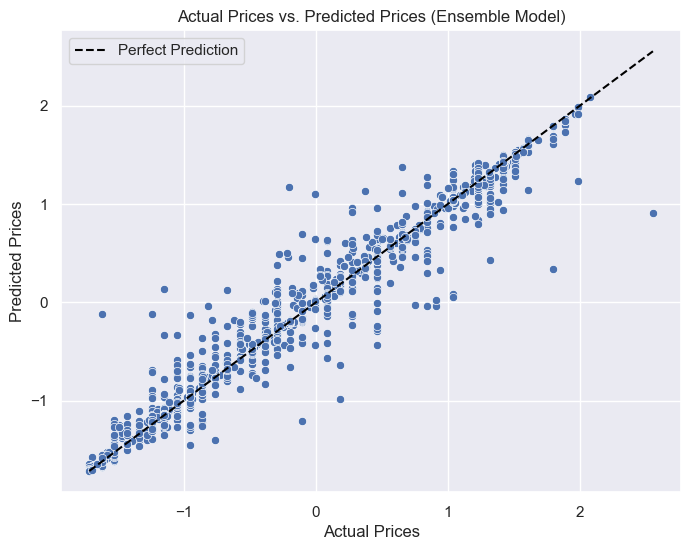

In [40]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Ensemble Model)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

### Summary and Conclusion

In this project, I aimed to predict individuals' salaries using various data preprocessing techniques and machine learning models. The steps and methodologies employed are as follows:

1. Data Cleaning and Preprocessing:
   - Handling Missing Values: Given the very few missing values, they were removed as their impact on the final prediction was negligible.
   
2. Categorical Encoding and Feature Engineering:
   - Gender Simplification: The gender feature, which initially had three categories, was reduced to two categories.
   - Education and Occupation Simplification: Unique values in the education and occupation features were reduced to simplify the model and decrease complexity.

3. Data Visualization:
   - Appropriate visualizations were created to explore and understand the data patterns and relationships.

4. Data Standardization and Labeling:
   - Data standardization was performed to normalize the features, and label encoding was applied to convert categorical variables into numerical format.

5. Model Training and Optimization:
   - The performance of two models, XGBoost (XGB) and Random Forest, was optimized using Grid Search.
   - The optimized models were then combined into an ensemble model, which resulted in a final accuracy of 95.4%.

These steps ensured a comprehensive analysis and model training process, leading to a highly accurate prediction model for individuals' salaries.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com
